# 202131005_RADEN R BINTANG

In [1]:
!pip install imutils

## IMPORTING LIBRARY

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

## READ IMAGE

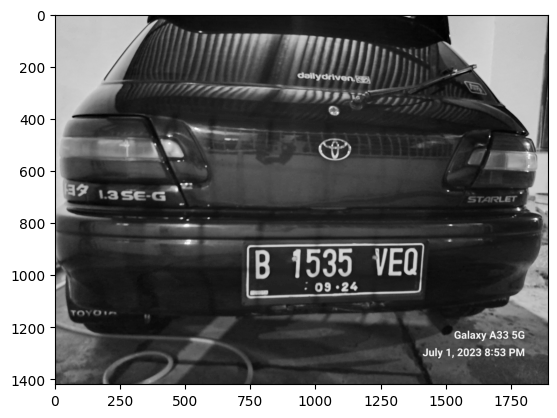

In [3]:
img = cv2.imread('./starlet.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

## APPLY FILTERS

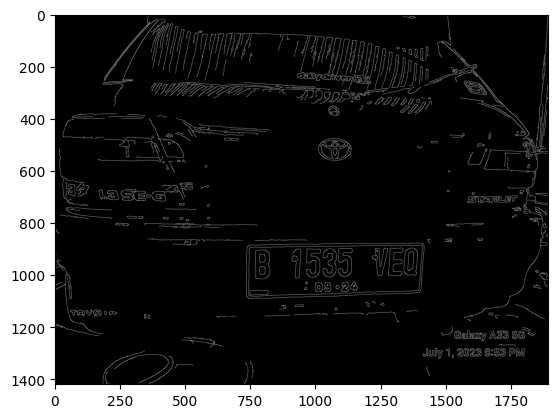

In [4]:
b_filter = cv2.bilateralFilter(gray, 11, 17, 17)  #Noise reduction
edged = cv2.Canny(b_filter, 30, 100)  #Edge detection
plt.imshow(edged, cmap='gray')

## FIND CONTOURS

In [5]:
key_point = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(key_point)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
""" variable location akan menyimpan posisi x dan y dari platnomor yang di ambil dari kontur """
location

array([[[1410,  889]],

       [[ 749,  895]],

       [[ 743, 1077]],

       [[1390, 1061]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

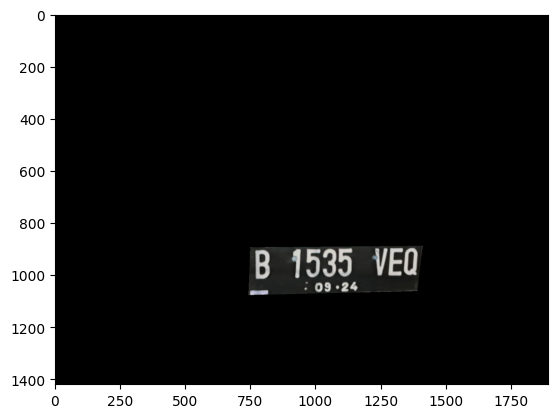

In [9]:
plt.imshow(new_image, cmap='gray')

In [10]:
x, y = np.where(mask == 255)
x1, y1 = np.min(x), np.min(y)
x2, y2 = np.max(x), np.max(y)
cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

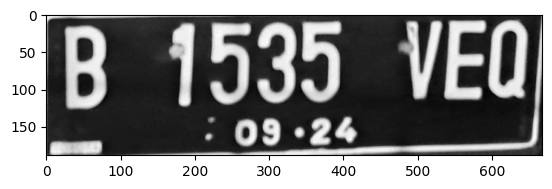

In [11]:
plt.imshow(cropped_image, cmap='gray')

In [12]:
cropped_edge = cv2.Canny(cropped_image, 30, 200)  # Edge detection
thresh, binary = cv2.threshold(cropped_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

Text(0.5, 1.0, 'citra biner')

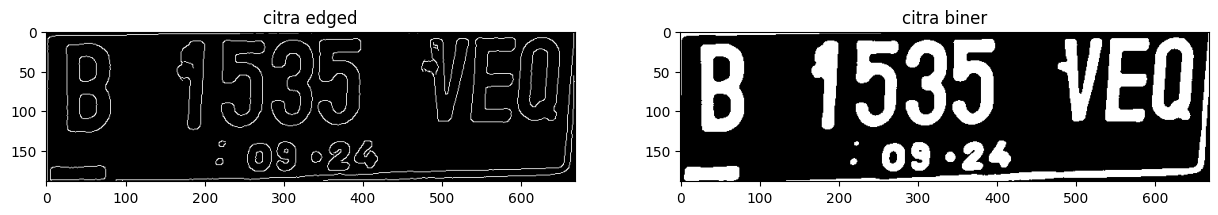

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()

axs[0].imshow(cropped_edge, cmap='gray')
axs[0].set_title('citra edged')

axs[1].imshow(binary, cmap='gray')
axs[1].set_title('citra biner')

In [14]:
cv2.imwrite('./plat-citra-tepi.png', cropped_edge)
cv2.imwrite('./plat-citra-biner.png', binary)

True